<a href="https://colab.research.google.com/github/AaronRM9416/Platform-Performance-Gaming-/blob/main/Platform_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Platform Sales and Review Scores

Aaron Musselwhite

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector, make_column_transformer              ##imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import set_config
set_config(display='diagram')

#Data Review and Cleaning

In [ ]:
games= pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRJiyV_o3XPU0pvlMVCM8JrlpXl2hcP1hezOnFBGLQWZq3G0COBwVyOuakBhv31Lt9cgU18RSyBQpWp/pub?output=csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df= games.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
df.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [ ]:
df =df.drop(columns=['Year_of_Release','Genre','User_Count','Developer','Critic_Count','Rating','Other_Sales'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16717 non-null  object 
 1   Platform      16719 non-null  object 
 2   Publisher     16665 non-null  object 
 3   NA_Sales      16719 non-null  float64
 4   EU_Sales      16719 non-null  float64
 5   JP_Sales      16719 non-null  float64
 6   Global_Sales  16719 non-null  float64
 7   Critic_Score  8137 non-null   float64
 8   User_Score    7590 non-null   float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
Plat_counts = df.Platform.value_counts(ascending=True)
Plat_counts.head()

PCFX    1
GG      1
TG16    2
3DO     3
WS      6
Name: Platform, dtype: int64

#Early Vsiuals

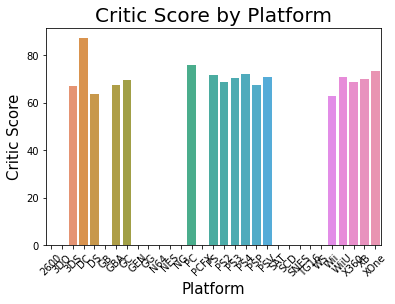

In [ ]:
plat_group = df.groupby('Platform').mean().reset_index()

sns.barplot(data=plat_group, x='Platform', y='Critic_Score')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Critic Score by Platform', fontsize=20)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Critic Score', fontsize=15)
plt.xticks(rotation = 45);

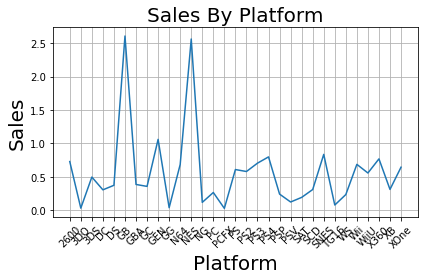

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)

axes.plot(plat_group['Platform'], plat_group['Global_Sales'])
axes.set_title('Sales By Platform', fontsize=20)
axes.set_ylabel('Sales', fontsize=20)
axes.set_xlabel("Platform", fontsize=20)
axes.grid()
plt.xticks(rotation = 45);
plt.tight_layout()
plt.show()

#X/Y Split & Preprocessing 

In [ ]:
X = df.drop(columns=['Platform'])
y = df['Platform']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
num_select = make_column_selector(dtype_include='number')
cat_select = make_column_selector(dtype_include='object')

In [ ]:
num_column = num_select(X_train)
cat_column = cat_select(X_train)
print('numeric columns are', num_column)
print('categorical columns are', cat_column)

numeric columns are ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']
categorical columns are ['Name', 'Publisher']


In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [ ]:
num_tup = (mean_imputer, num_select)
cat_tup = (freq_imputer, cat_select)
col_transform = make_column_transformer(num_tup, cat_tup, remainder='passthrough')
col_transform

ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1', SimpleImputer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4190>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4110>)])

In [ ]:
col_transform.fit(X_train)
X_train_imputed = col_transform.transform(X_train)
X_test_imputed = col_transform.transform(X_test) 
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().sum()

Name            0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
Critic_Score    0
User_Score      0
dtype: int64

In [ ]:
Stan_Scale = StandardScaler(with_mean=False)
OHE = OneHotEncoder(handle_unknown='ignore')

In [ ]:
num_pipe = make_pipeline(mean_imputer, Stan_Scale)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler(with_mean=False))])

In [ ]:
nom_pipe = make_pipeline(freq_imputer, OHE)
nom_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
num_tup_pro= (num_pipe,num_select)
nom_tup_pro= (nom_pipe, cat_select)

pre_pro = make_column_transformer(num_tup_pro, nom_tup_pro)
pre_pro

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4110>)])

In [ ]:
pre_pro.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4110>)])

In [ ]:
X_train_pro = pre_pro.transform(X_train)
X_test_pro = pre_pro.transform(X_test)

In [ ]:
print(pd.isna(X_train_pro), 'missing values in training data')
print(pd.isna(X_test_pro), 'missing values in testing data')
print('\n')
print('All data in X_train_pro are', X_train_pro.dtype)
print('All data in X_test_pro are', X_test_pro.dtype)
print('\n')
print('shape of data is', X_train_pro.shape)
print('\n')
X_train_pro

False missing values in training data
False missing values in testing data


All data in X_train_pro are float64
All data in X_test_pro are float64


shape of data is (12539, 9820)




<12539x9820 sparse matrix of type '<class 'numpy.float64'>'
	with 84621 stored elements in Compressed Sparse Row format>

# ***Classification Models***

# Dummy

In [ ]:
dumC= DummyClassifier(random_state=42, strategy= 'most_frequent')
dumC.get_params()

{'constant': None, 'random_state': 42, 'strategy': 'most_frequent'}

In [ ]:
dumC.fit(X_train_pro, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [ ]:
dum_pred =dumC.predict(X_test_pro)

In [ ]:
train_scoredum = dumC.score(X_train_pro,y_train)
test_scoredum = dumC.score(X_test_pro, y_test)
print(train_scoredum)
print(test_scoredum)

0.12863864742004943
0.12894736842105264


In [ ]:
accuracy_score(y_test,dum_pred)

0.12894736842105264

In [ ]:
recall_score(y_test, dum_pred, average='weighted')

0.12894736842105264

In [ ]:
##i found this loop as well as the visual to help me consolidate my tuning of hyperparameters. here is my source #https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/amp/
strategies = ['most_frequent', 'stratified', 'uniform'] 

test_scores = [] 

for s in strategies: 

    if s =='constant': 

        dumC2 = DummyClassifier(strategy = s, random_state = 0)                    

    else: 

        dumC2 = DummyClassifier(strategy = s, random_state = 0) 

    dumC2.fit(X_train_pro, y_train) 

    score = dumC2.score(X_test_pro, y_test) 

    test_scores.append(score)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


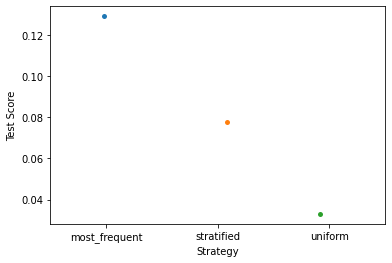

In [ ]:
Dum_class_plot = sns.stripplot(strategies, test_scores); 

Dum_class_plot.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

# Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2) 

In [ ]:
dec_tree.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.fit(X_train_pro, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
dec_pred= dec_tree.predict(X_test_pro)

In [ ]:
train_scoringtree = dec_tree.score(X_train_pro,y_train)
test_scoringtree = dec_tree.score(X_test_pro, y_test)
print(train_scoringtree)
print(test_scoringtree)

0.21955498843607943
0.2160287081339713


In [ ]:
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

        2600       0.00      0.00      0.00        32
         3DO       0.00      0.00      0.00         1
         3DS       0.00      0.00      0.00       150
          DC       0.00      0.00      0.00        10
          DS       0.38      0.37      0.38       539
          GB       0.00      0.00      0.00        24
         GBA       0.00      0.00      0.00       207
          GC       0.00      0.00      0.00       143
         GEN       0.00      0.00      0.00         6
         N64       0.00      0.00      0.00        87
         NES       0.00      0.00      0.00        20
          NG       0.00      0.00      0.00         3
          PC       0.44      0.67      0.53       225
          PS       0.00      0.00      0.00       301
         PS2       0.17      0.72      0.28       561
         PS3       0.00      0.00      0.00       344
         PS4       0.00      0.00      0.00       103
         PSP       0.16    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = DecisionTreeClassifier()                 ## checking multiple hyperparameters similtaneously 
 
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}

In [ ]:
dt_grid_search = GridSearchCV(model, param_grid)

In [ ]:
dt_grid_search.fit(X_train_pro, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3],
                         'min_samples_leaf': [3, 15, 20],
                         'min_samples_split': [2, 10, 100]})

In [ ]:
dt_grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
param_grid2 = {'max_depth': [3, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 4, 7]}
 
dt_grid_search2 = GridSearchCV(model, param_grid2)
dt_grid_search2.fit(X_train_pro, y_train)
dt_grid_search2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
best_model = dt_grid_search2.best_estimator_
best_model.fit(X_train_pro, y_train)
best_model.score(X_test_pro, y_test)

0.32392344497607656

# KNN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_pipe = make_pipeline(Stan_Scale, knn)
knn_pipe.fit(X_train_pro, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [ ]:
predictions = knn_pipe.predict(X_test_pro)
predictions

array(['PS2', 'WiiU', 'PC', ..., '3DS', 'WiiU', 'PS2'], dtype=object)

In [ ]:
acc_score = knn_pipe.score(X_test_pro, y_test)
acc_score

0.02631578947368421

#PCA

In [ ]:
scaled_df = Stan_Scale.fit_transform(X_test_pro)

In [ ]:
ohe_2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
Spar_pipe = make_pipeline(freq_imputer, ohe_2) ## creating new pipe with different rules to handle PCA
Spar_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
Spar_tup_pro= (Spar_pipe, cat_select)
pre_pro = make_column_transformer(num_tup_pro, Spar_tup_pro)
pre_pro


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4110>)])

In [ ]:
pre_pro.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler(with_mean=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4190>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0cebdb4110>)])

In [ ]:
Xspar_train_pro = pre_pro.transform(X_train)
Xspar_test_pro = pre_pro.transform(X_test)

In [ ]:
pca = PCA(n_components=9)
pcs = pca.fit_transform(Xspar_test_pro)

In [ ]:
pca85 = PCA(n_components=.85)

In [ ]:
transformer = make_pipeline(Stan_Scale, PCA(n_components=9))

In [ ]:
DTC_pipe = make_pipeline(transformer, model)
DTC_pipe.fit(Xspar_train_pro, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler',
                                  StandardScaler(with_mean=False)),
                                 ('pca', PCA(n_components=9))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
print('Training accuracy:', DTC_pipe.score(Xspar_train_pro, y_train))
print('Testing accuracy:', DTC_pipe.score(Xspar_test_pro, y_test))

Training accuracy: 0.4416620145147141
Testing accuracy: 0.11650717703349282


In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_pro, y_train)

GradientBoostingClassifier()

In [ ]:
print('Training accuracy:', gbc.score(X_train_pro, y_train))
print('Testing accuracy:', gbc.score(X_test_pro, y_test))

Training accuracy: 0.6148815695031502
Testing accuracy: 0.32344497607655504


# I have chosen to go with the Gradient Boosting model. While its not exceptionally accurate it is the most accurate out of the bunch. and can see a large improvement over the previous models